# Q2: Relationship Between Minutes Played and Scoring Output

This notebook investigates how minutes played influence scoring performance.


We aim to understand:

- Does scoring increase linearly with minutes?
- Is there a point of diminishing returns?
- Are some players unusually efficient per minute?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/player_game_stats_clean.csv")
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,GmSc,Data,Win,GameKey,PTS_per_min,TRB_per_min,AST_per_min
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,1,1,37,38.1,2024-10-22,1,2024-10-22_BOS_vs_NYK,1.221122,0.132013,0.330033
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,1,1,36,34.0,2024-10-22,1,2024-10-22_LAL_vs_MIN,0.957956,0.425758,0.106440
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,0,1,24,22.4,2024-10-22,1,2024-10-22_BOS_vs_NYK,0.901239,0.112655,0.150207
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,0,2,18,19.5,2024-10-22,1,2024-10-22_BOS_vs_NYK,0.589777,0.131062,0.131062
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,1,1,22,17.8,2024-10-22,0,2024-10-22_NYK_vs_BOS,0.851064,0.000000,0.077369


Converted Minutes Played column (MP) to float, calculated the points per minute for each player and organized the list with the top 10 players with the most PPM.

In [31]:
df['MP'] = df['MP'].astype(float)
df['MP']

df['PPM'] = df['PTS'] / df['MP']
df['PPM']

ppm_list = df[['Player', 'PPM']]

ppm_list_sorted = ppm_list.sort_values(by='PPM', ascending=False)
print(ppm_list_sorted.head(10))

top50 = df.sort_values(by='PTS', ascending=False).head(50)

                    Player       PPM
5132      Chris Livingston  4.000000
7671               JT Thor  3.030303
11561     Brandon Williams  2.797203
10584        Maxwell Lewis  2.777778
10905  Patrick Baldwin Jr.  2.678571
4063          Chris Duarte  2.597403
6347        Jazian Gortman  2.564103
11670        Chris Boucher  2.518892
12259            Matt Ryan  2.515723
4055             KJ Martin  2.459016


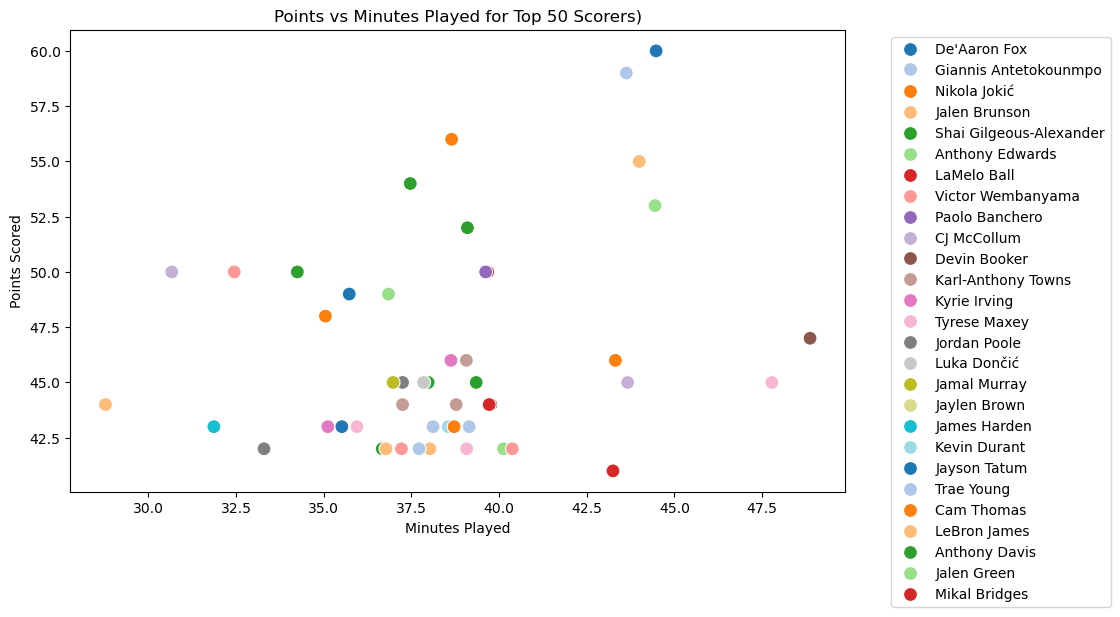

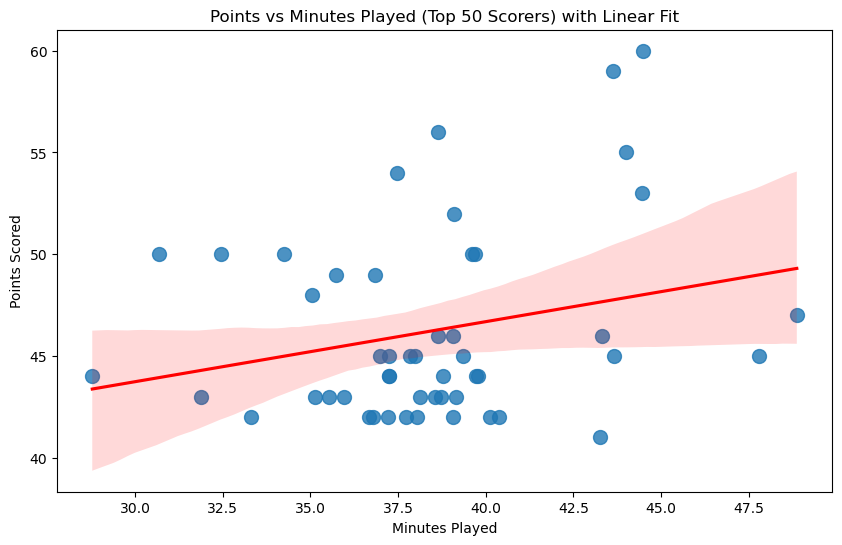

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top50, x='MP', y='PTS', hue='Player', palette='tab20', s=100)
plt.title('Points vs Minutes Played for Top 50 Scorers)')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(data=top50, x='MP', y='PTS', scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Points vs Minutes Played (Top 50 Scorers) with Linear Fit')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.show()

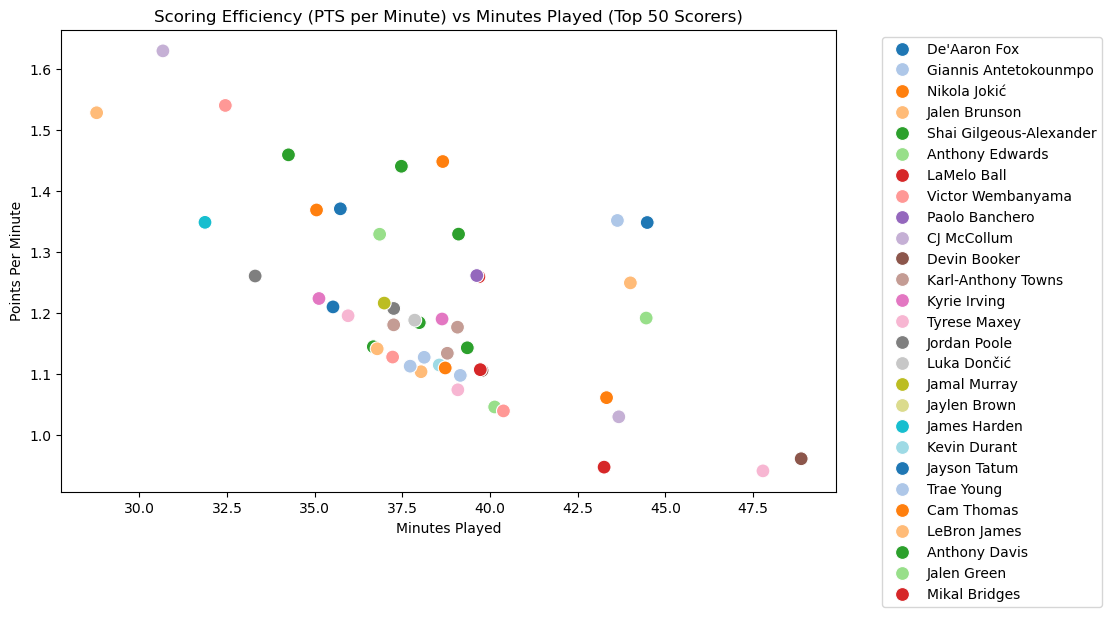

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top50, x='MP', y='PPM', hue='Player', palette='tab20', s=100)
plt.title('Scoring Efficiency (PTS per Minute) vs Minutes Played (Top 50 Scorers)')
plt.xlabel('Minutes Played')
plt.ylabel('Points Per Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Calculate the Correlation Coefficient to see if there is a relationship between MP and PTS.

In [40]:
corr = df['MP'].corr(df['PTS'])
print(f'Pearson correlation between Minutes and Points: {corr:.2f}')

Pearson correlation between Minutes and Points: 0.74
